## Аннотация: Определение перспективного тарифа для телеком-компании

На основе данных 500 пользователей федерального оператора сотовой связи «Мегалайн» за 2018 год нужно провести предварительный статистический анализ данных о тарифах «Смарт» и «Ультра». 

**Цель исследования:** скорректировать рекламный бюджет компании. 

**Задача исследования:** проанализировать поведение клиентов и сделать вывод о том, какой тариф приносит большую выручку.

## Знакомство с данными

In [156]:
#импортируем библиотеки, которые понадобятся нам в ходе исследования
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Теперь необходимо ознакомиться с имеющимися данными, провести их первичный анализ, чтобы получить общее представление о том, с чем придется работать в ходе исследования, и чтобы выявить проблемы в данных, которые нужно будет устранить на этапе предобработки. \
Так как в этот раз мы будем работать сразу с несколькими исходными таблицами, то удобнее будет автоматизировать процесс получения необходимой информации. Создадим функцию, которая будет выводить:
- общую информацию о таблице;
- 10 первых и последних строк фрейма;
- описательную статистику таблицы;
- результаты проверки на наличие в данных явных дубликатов.

In [157]:
def study_of_initial_data(data): #создаем функцию
    print(data.info())
    print()
    display(data.head(10))
    print()
    display(data.tail(10))
    print()
    display(data.describe())
    print()
    print(data.duplicated().sum())

In [158]:
#применяем специальный метод для чтения файлов формата csv
initial_data_about_calls = pd.read_csv('/datasets/calls.csv')
initial_data_about_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
initial_data_about_messages = pd.read_csv('/datasets/messages.csv')
initial_data_about_tariffs = pd.read_csv('/datasets/tariffs.csv')
initial_data_about_users = pd.read_csv('/datasets/users.csv')

In [159]:
#применяем функцию study_of_initial_data() к каждой таблице
study_of_initial_data(initial_data_about_calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None



,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,id,call_date,duration,user_id
202597,1499_210,2018-10-02,8.86,1499
202598,1499_211,2018-12-29,4.58,1499
202599,1499_212,2018-12-30,1.35,1499
202600,1499_213,2018-10-17,10.77,1499
202601,1499_214,2018-12-05,2.42,1499
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000



0


In [160]:
study_of_initial_data(initial_data_about_internet)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None



,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


,id,mb_used,session_date,user_id
149386,1499_147,0.00,2018-10-21,1499
149387,1499_148,268.19,2018-11-13,1499
149388,1499_149,778.68,2018-11-24,1499
149389,1499_150,273.98,2018-11-20,1499
149390,1499_151,752.72,2018-10-11,1499
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499
149395,1499_156,544.37,2018-10-26,1499


,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000



0


In [161]:
study_of_initial_data(initial_data_about_messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,id,message_date,user_id
123026,1499_174,2018-12-14,1499
123027,1499_175,2018-10-09,1499
123028,1499_176,2018-12-17,1499
123029,1499_177,2018-12-30,1499
123030,1499_178,2018-10-25,1499
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000



0


In [162]:
study_of_initial_data(initial_data_about_tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000



0


In [163]:
study_of_initial_data(initial_data_about_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
490,1490,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart
491,1491,56,NaN,Челябинск,Радислав,Андрейкин,2018-04-25,ultra
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
493,1493,71,NaN,Красноярск,Таисия,Ахматулина,2018-11-24,ultra
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000



0


### Вывод

Все исходные таблицы имеют разные размеры и содержат разные объемы данных. Явных проблем, как и явных дубликатов, выявлено практически не было, за исключением формата, в котором указаны даты в датафреймах, и столбца Unnamed: 0, дублирующего индексы в таблице initial_data_about_internet. Однако для удобства при использовании данных из таблиц можно обработать их следующим образом:
- привести даты к формату datetime;
- округлить и привести к целочисленному формату данные о длительности звонков и объемах трафика;
- осуществить группировку данных в таблицах initial_data_about_calls, initial_data_about_messages, initial_data_about_internet;
- объединить имеющиеся таблицы в одну.

## Предобработка данных

### Начало предобработки

Начнем предобработку с того, что отформатируем даты в имеющихся таблицах и произведем округление. Т.к по условиям тарифов оператор округляет объемы использованных минут и интернета в большую сторону, используем функцию ceil().

In [164]:
#форматируем даты
initial_data_about_calls['call_date'] = pd.to_datetime(initial_data_about_calls['call_date'], format="%Y-%m-%d")
initial_data_about_internet['session_date'] = pd.to_datetime(initial_data_about_internet['session_date'], format="%Y-%m-%d")
initial_data_about_messages['message_date'] = pd.to_datetime(initial_data_about_messages['message_date'], format="%Y-%m-%d")
initial_data_about_users['reg_date'] = pd.to_datetime(initial_data_about_users['reg_date'], format="%Y-%m-%d")

#производим округление
initial_data_about_calls['duration'] = np.ceil(initial_data_about_calls['duration']) 
initial_data_about_internet['mb_used'] = np.ceil(initial_data_about_internet['mb_used'])

### Группировка данных

Для того, чтобы объединить таблицы с данными о звонках, сообщениях и трафике, сгруппируем данные в них. Группировать будем по месяцам, поэтому сначала добавим в каждую таблицу новый столбец month:

In [165]:
initial_data_about_calls['month'] = initial_data_about_calls['call_date'].dt.month
initial_data_about_internet['month'] = initial_data_about_internet['session_date'].dt.month
initial_data_about_messages['month'] = initial_data_about_messages['message_date'].dt.month

In [166]:
#осуществляем группировку
initial_data_about_calls = initial_data_about_calls.groupby(['user_id', 'month']).agg({'duration':['count',
                                                                                     'sum']}).reset_index()
#переименуем столбцы для более легкого ориентирования в данных и большей информативности
initial_data_about_calls.columns = ['user_id','month','number_of_calls','minutes_used'] 
display(initial_data_about_calls.head()) #проверим результат

,user_id,month,number_of_calls,minutes_used
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


In [167]:
initial_data_about_internet = initial_data_about_internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
display(initial_data_about_internet.head())

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0


In [168]:
initial_data_about_messages = initial_data_about_messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()
initial_data_about_messages = initial_data_about_messages.rename(columns={'id':'sent_messages'}) #переименовываем столбец
display(initial_data_about_messages.head())

,user_id,month,sent_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Создание общей таблицы с данными об использовании услуг

Теперь все готово для объединения таблиц. Используем метод merge, выбрав тип объединения outer:

In [169]:
services_usage_data = initial_data_about_calls.merge(initial_data_about_internet, on=['user_id', 'month'], 
                                                     how='outer').merge(initial_data_about_messages, 
                                                     on=['user_id', 'month'], how='outer')
display(services_usage_data.head())      

,user_id,month,number_of_calls,minutes_used,mb_used,sent_messages
0,1000,5,22.0,159.0,2256.0,22.0
1,1000,6,43.0,172.0,23257.0,60.0
2,1000,7,47.0,340.0,14016.0,75.0
3,1000,8,52.0,408.0,14070.0,81.0
4,1000,9,58.0,466.0,14581.0,57.0


Итак, мы получили единую таблицу с данными об использовании услуг абонентами "Мегалайна", далее будем работать с ней, делая ее более удобной для использования в исследовании, а именно:
- заменим пропущенные значения, появившиеся после объединения;
- округлим данные о длительности звонков и объемах трафика;
- приведем все данные к целочисленному формату.

Производем замену пропущенных значений (в данном случае уместно заменить их на 0 - это не окажет критического искажающего влияния на результаты исследования).

In [170]:
services_usage_data = services_usage_data.fillna(0) #меняем значения
print(services_usage_data.isna().sum()) #проверяем результат замены, а заодно и переименовывания

user_id            0
month              0
number_of_calls    0
minutes_used       0
mb_used            0
sent_messages      0
dtype: int64


Столбцы переименованы, пропущенных значений больше нет - можно форматировать данные. 

In [171]:
services_usage_data = services_usage_data.astype('int') #приводим данные к целочисленному формату
display(services_usage_data.head()) #проверяем результаты округления
print(services_usage_data.info()) #проверяем результаты форматирования

,user_id,month,number_of_calls,minutes_used,mb_used,sent_messages
0,1000,5,22,159,2256,22
1,1000,6,43,172,23257,60
2,1000,7,47,340,14016,75
3,1000,8,52,408,14070,81
4,1000,9,58,466,14581,57


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id            3214 non-null int64
month              3214 non-null int64
number_of_calls    3214 non-null int64
minutes_used       3214 non-null int64
mb_used            3214 non-null int64
sent_messages      3214 non-null int64
dtypes: int64(6)
memory usage: 175.8 KB
None


### Итоговое объединение данных

Для того, чтобы продолжить объединение данных в одну таблицу, переименуем столбец, содержащий сведения о тарифе, в таблице initial_data_about_users:

In [172]:
initial_data_about_users = initial_data_about_users.rename(columns={'tariff':'tariff_name'})

#теперь присоединяем к таблице с данными об использовании услуг оставиеся таблицы
services_usage_data = services_usage_data.merge(initial_data_about_users, on=['user_id'], 
                                                     how='left').merge(initial_data_about_tariffs, 
                                                     on=['tariff_name'], how='left')
display(services_usage_data.head()) #проверяем результат объединения

,user_id,month,number_of_calls,minutes_used,mb_used,sent_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,2256,22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43,172,23257,60,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47,340,14016,75,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52,408,14070,81,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58,466,14581,57,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Теперь все исходные данные представлены в одном датафрейме. Можно заметить, что в столбце churn_date много отсутствующих значений, при этом с большой долей вероятности его данные (как и данные столбцов reg_date и age) не понадобятся нам в дальнейшем исследовании. Cтолбцы с именем и фамилией пользователя также избыточны, т.к. каждый пользователь имеет уникальный номер id. Удалим их из таблицы методом drop():

In [173]:
services_usage_data = services_usage_data.drop(['churn_date', 'reg_date', 'first_name', 'last_name', 'age'], axis = 1)

На этом предобработку данных можно считать завершенной и перейти к добавлению в таблицу новых данных.

## Расчет данных для каждого пользователя

Согласно задачам исследования, нам необходимо определить следующие данные по каждому абоненту:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

Благодаря группировке, выполненной на этапе 3.2, мы уже имеем данные, указанные в первых трех пунктах. Теперь подсчитаем выручку для каждого пользователя по формуле, данной в условии. Для начала создадим столбцы, содержащие данные о наличии или отсутствии перерасхода выделенных в тарифе минут, сообщений и гигабайтов. Т.к. в данных о тарифах трафик указан в гб, переведем получившиеся данные в них, округлив в большую сторону.

In [174]:
services_usage_data['minutes_over'] = services_usage_data['minutes_used'] - services_usage_data['minutes_included']
services_usage_data['message_over'] = services_usage_data['sent_messages'] - services_usage_data['messages_included']
services_usage_data['gb_over'] = np.ceil((services_usage_data['mb_used'] - services_usage_data['mb_per_month_included']) / 1024)

Далее создадим функцию, которая выявит среди полученных данных превышения пакетов услуг и подсчитает итоговую сумму, которую каждый абонент должен был заплатить в том или ином месяце. Подчеркну, что о превышении лимита услуг будет свидетельствовать положительное значение в соответствующем столбце.

In [175]:
#создаем функцию для подсчета месячной выручки
def revenue(row):
    total = row['rub_monthly_fee']
    if row['minutes_over'] > 0:
        total += row['minutes_over'] * row['rub_per_minute']
    if row['message_over'] > 0:
        total += row['message_over'] * row['rub_per_message']
    if row['gb_over'] > 0:
        total += row['gb_over'] * row['rub_per_gb']
    return total

#применяем функцию к имеюимся данным, создавая новый столбец таблицы
services_usage_data['revenue'] = services_usage_data.apply(revenue, axis=1)

#проверяем результат 
display(services_usage_data.head(10))

,user_id,month,number_of_calls,minutes_used,mb_used,sent_messages,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,message_over,gb_over,revenue
0,1000,5,22,159,2256,22,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2841,-978,-27.0,1950.0
1,1000,6,43,172,23257,60,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2828,-940,-7.0,1950.0
2,1000,7,47,340,14016,75,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2660,-925,-16.0,1950.0
3,1000,8,52,408,14070,81,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2592,-919,-16.0,1950.0
4,1000,9,58,466,14581,57,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2534,-943,-15.0,1950.0
5,1000,10,57,350,14717,73,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2650,-927,-15.0,1950.0
6,1000,11,43,338,14768,58,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2662,-942,-15.0,1950.0
7,1000,12,46,333,9827,70,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2667,-930,-20.0,1950.0
8,1001,11,59,430,18452,0,Москва,smart,50,15360,500,550,200,3,3,-70,-50,4.0,1350.0
9,1001,12,63,414,14053,0,Москва,smart,50,15360,500,550,200,3,3,-86,-50,-1.0,550.0


Проверим корректность работы функции. Как мы видим из таблицы, представленной выше, у абонента 1001 в ноябре был превышен лимит по трафику интернета на 3 гб. По условию тарифа, каждый гигабайт свыше пакета оплачивается 200 рублями. Тогда абонент 1001 должен был уплатить:

In [176]:
print(550 + (200 * 3))

1150


Данные сошлись, значит, можно сделать вывод о корректности работы функции revenue() и полученных в ходе ее использования данных о выручке. Переходим к анализу данных.

## Анализ данных

Нам нужно проанализировать поведение клиентов оператора в зависимости от того, каким тарифным планом они пользуются. Разумным шагом будет разнесение данных из сводной таблицы по двум специализированным. Кроме того, выведем на экран описательную статистику по тем столбцам новых таблиц, для которых нужно посчитать ключевые характеристики: среднее, дисперсию и стандартное отклонение. Для определения дисперсии используем метод var().

In [177]:
#вычленяем данные пользователей тарифа "Ультра"
services_usage_ultra =  services_usage_data[services_usage_data['tariff_name'] == 'ultra'] 
#выводим описательную статистику нужных столбцов
print(services_usage_ultra[['minutes_used', 'sent_messages', 'mb_used']].describe())

       minutes_used  sent_messages       mb_used
count    985.000000     985.000000    985.000000
mean     526.623350      49.363452  19486.901523
std      317.606098      47.804457  10096.317202
min        0.000000       0.000000      0.000000
25%      284.000000       6.000000  11785.000000
50%      518.000000      38.000000  19324.000000
75%      752.000000      79.000000  26863.000000
max     1673.000000     224.000000  49789.000000


In [178]:
#выводим дисперсию нужных столбцов
print(np.var(services_usage_ultra[['minutes_used', 'sent_messages', 'mb_used']], ddof=1))

minutes_used     1.008736e+05
sent_messages    2.285266e+03
mb_used          1.019356e+08
dtype: float64


In [179]:
services_usage_smart = services_usage_data[services_usage_data['tariff_name'] == 'smart']
services_usage_smart[['minutes_used', 'sent_messages', 'mb_used']].describe()

,minutes_used,sent_messages,mb_used
count,2229.000000,2229.000000,2229.000000
mean,417.934948,33.384029,16229.188425
std,190.313730,28.227876,5877.576978
min,0.000000,0.000000,0.000000
25%,282.000000,10.000000,12658.000000
50%,422.000000,28.000000,16531.000000
75%,545.000000,51.000000,20068.000000
max,1435.000000,143.000000,38610.000000


In [180]:
print(np.var(services_usage_smart[['minutes_used', 'sent_messages', 'mb_used']], ddof=1))

minutes_used     3.621932e+04
sent_messages    7.968130e+02
mb_used          3.454591e+07
dtype: float64


Сравним ключевые характеристики по тарифам. Стандартное отклонение и дисперсия показывают сильный разброс и неоднородность данных, при этом стоит отметить, что в данных по тарифу "Смарт" характеристики разброса значительно меньше, чем в тарифе "Ультра". \
Среднее мало отличается от медианы (в "Смарте" отличия минимальны), что может означать слабое влияние на него экстремальных значений или практически полное его отсутствие.

Теперь построим гистограммы для сравнения поведения клиентов обоих тарифов в части использования минут, сообщений и мегабайтов.

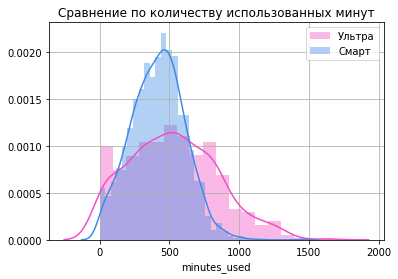

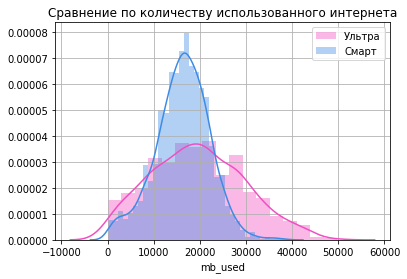

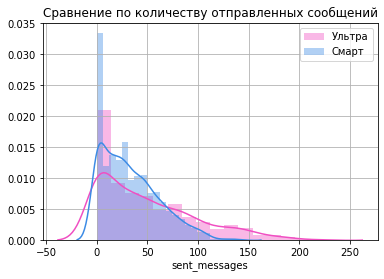

In [181]:
#строим графики по каждому параметру для города и его центральной зоны
sns.distplot(services_usage_ultra['minutes_used'], color='#f04fc2', label="Ультра")
sns.distplot(services_usage_smart['minutes_used'], color='#3c8be5', label="Смарт")
plt.title('Сравнение по количеству использованных минут')
plt.legend()
plt.grid()
plt.show()

sns.distplot(services_usage_ultra['mb_used'], color='#f04fc2', label="Ультра")
sns.distplot(services_usage_smart['mb_used'], color='#3c8be5', label="Смарт")
plt.title('Сравнение по количеству использованного интернета')
plt.legend()
plt.grid()
plt.show()

sns.distplot(services_usage_ultra['sent_messages'], color='#f04fc2', label="Ультра")
sns.distplot(services_usage_smart['sent_messages'], color='#3c8be5', label="Смарт")
plt.title('Сравнение по количеству отправленных сообщений')
plt.legend()
plt.grid()
plt.show()


Согласно данным гистограммы, чаще всего пользователи тарифа "Ультра" используют от 435 до 515 минут, а пользователи "Смарта" от 410 до 450. Т.е в первом случае клиенты используют примерно одну шестую выданного им объема минут (а к границе в 3000 не приблизился ни один абонент), а во втором используют большую часть пакета, но чаще всего не превышают его лимита. \
В то же время абонентам "Смарта" зачастую бывает недостаточно того объема трафика, что предлагает им тариф: большая часть абонентов превышает лимит и использует от 16,8 тыс мб (16,4 гб) до 17,7 тыс мб (17,3 гб) интернета. Абонентам "Ультра" пакета интернета хватает с лихвой: чаще всего они тратят от 21 тыс мб (20,5 гб) до 23,9 тыс мб (23,3 гб) интернета в месяц. \
Сообщения не пользуются популярностью у абонентов обоих тарифов, и их пакеты часто остаются нетронутыми. Абоненты "Ультра" чаще шлют SMS, но разница крайне мала. Скорее всего это связано с развитием и ростом популярности разнообразных мессенджеров и социальных сетей.

Если говорить о распределениях, то все анализируемые данные ассиметричны и имеют скошенность вправо в различной степени. \
Больше всего скошены вправо данные о количестве отправленных сообщений - это заметно на графике и подтверждается сравнением медианы и среднего (медиана ощутимо меньше среднего). Стоит отметить, что данные клиентов тарифа "Ультра" более ассиметричны. \
Данные об использовании минут и мегабайт имеют малую ассиметрию, можно сказать, что они распределены "практически нормально". Отклонения в минутах "Смарта" и мегабайтах "Ультра" минимальны.

На этом шаге завершается этап анализа данных. Переходим к формулированию и проверке гипотез.

## Проверка гипотез

### Формулирование гипотез

Т.к. H₀ всегда формулируется так, чтобы использовать знак равенства, сформулируем нулевые гипотезы следующим образом:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» равны между собой;
- средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Основные утверждения о различиях выручек не уточняют, отличаются ли они в большую или меньшую сторону, поэтому проверять будем двусторонние гипотезы. Тогда альтернативные статистические гипотезы будут звучать так:
- средняя выручка пользователей тарифа «Ультра» не равна выручке пользователей тарифа «Смарт»;
- средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов.

Уровень значимости возьмём равный 5%. Параметру equal_var передадим значение False, так как выборки различаются  и это может сильно исказить результаты исследования.

### Проверка гипотезы о различной выручке по тарифам

In [182]:
alpha = 0.05
results = st.ttest_ind (services_usage_ultra['revenue'], services_usage_smart['revenue'], equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу


Р-значение оказалось меньше уровня значимости, поэтому мы отвергаем нулевую гипотезу о равенстве выручек обоих тарифов и принимаем альтернативную гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

### Проверка гипотезы о различной выручке по городам

In [183]:
services_usage_moscow = services_usage_data[services_usage_data['city'] == 'Москва']
services_usage_regions = services_usage_data[services_usage_data['city'] != 'Москва']

alpha = 0.05
results = st.ttest_ind(services_usage_moscow['revenue'], services_usage_regions['revenue'], equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем гипотезу')
else:
    print('Не отвергаем гипотезу')

p-value: 0.5126564657748214
Не отвергаем гипотезу


В этом случае Р-значение превысило уровень значимости, поэтому мы не смогли отвергнуть нулевую гипотезу о равенстве средней выручки клиентов из Москвы и других городов.

## Итоговые выводы

Проведенное исследование позволило сделать следующие выводы:
- пользователям тарифа "Ультра" хватает того объема услуг, что предлагает им их тарифный план, а зачастую пакеты оказываются слишком большие и не используются даже наполовину;
- пользователи тарифа "Смарт" в основном укладываются в лимит по минутам, но часто вынуждены докупать дополнительные гигабайты интернета;
- пользователи обоих тарифов практически не используют пакет SMS-сообщений;
- данные об использованных услугах ассиметричны в различной степени и скошены вправо: больше всего ассиметрия проявляется в данных об отправленных сообщениях, тогда как распределение данных об использованных минутах и мегабайтах близко к нормальному;
- гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются - подтвердилась;
- гипотеза о равенстве средней выручки пользователей из Москвы и регионов не была отвергнута.


На основании результатов проведенного статистического анализа затруднительно сделать вывод о том, какой из тарифных планов лучше и приносит большую выручку. Мы подтвердили двустороннюю гипотезу о том, что выручка различается в зависимости от тарифа, но для более четкого понимания ситуации нужно провести проверку односторонних гипотез. \
Нагрузка на сети, которую оказывают абоненты тарифа "Ультра" не намного больше, однако абонентская плата за данный тариф существенно выше. В то же время абоненты тарифа "Смарт" часто доплачивают за дополнительные пакеты, в частности пакеты интернета.\
Что касается настроений клиентов, то можно предположить, что они довольно противоречивы. Абоненты "Ультра", которые большую часть времени используют лишь малую долю своих пакетов, могут быть недовольны столь высокой абонентской платой. К тому же она является высоким порогом для большинства клиентов, которые не могут позволить себе ежемесячно расходовать подобную сумму на услуги связи и мобильный интернет. В то же время абоненты "Смарта", часто покупающие дополнительные пакеты, могут испытывать недовольство из-за вынужденных переплат. Все эти факторы могут побудить клиентов "Мегалайн" начать поиск другого оператора. \
Я бы посоветовала, во избежание оттока клиентов, разработать новый тариф, сочетающий в себе преимущества имеющихся двух. Возможно, он будет дороже "Смарта", но предоставлять бОльшие пакеты минут и интернета. Другой вариант - оставить стоимость такой же, но увеличить выше указанные пакеты за счет удаления из тарифного плана пакета SMS, не пользующегося спросом.